## Model Training

In [1]:
import os
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import tensorflow as tf
warnings.filterwarnings('ignore')
%matplotlib inline

from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from sklearn.preprocessing import LabelEncoder
from tqdm.notebook import tqdm
from keras.models import load_model

In [5]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        # Skip files like .DS_Store
        if not os.path.isdir(os.path.join(dir, label)):
            continue

        for image_name in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, image_name))
            labels.append(label)
        print(label, 'completed')
    return image_paths, labels

In [6]:
TRAIN_DIR = 'dataset/train'
TEST_DIR = 'dataset/test'

# Load data
print('Training data:')
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

print('------------------------')

print('Testing data:')
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

Training data:
angry completed
neutral completed
happy completed
fear completed
surprise completed
disgust completed
sad completed
------------------------
Testing data:
angry completed
neutral completed
happy completed
fear completed
surprise completed
disgust completed
sad completed


In [7]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [8]:
# Extract features and normalize
train_features = extract_features(train['image'])
x_train = train_features / 255.0

test_features = extract_features(test['image'])
x_test = test_features / 255.0

  0%|          | 0/28821 [00:00<?, ?it/s]

  0%|          | 0/7066 [00:00<?, ?it/s]

In [9]:
# Convert labels to categorical
lbl_encoder = LabelEncoder()
y_train = lbl_encoder.fit_transform(train['label'])

y_train = lbl_encoder.transform(train['label'])
y_test = lbl_encoder.transform(test['label'])

y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [10]:
# Build model
model = Sequential()

# Convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(7, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,804,551 (22.14 MB)

 Trainable params: 5,804,551 (22.14 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Define F1-score class
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

In [15]:
# Compile model and set metrics
model.compile(optimizer='adam', loss ='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        F1Score()])

In [16]:
# Train model
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test,y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 32s 91ms/step - accuracy: 0.2369 - f1_score: 0.0043 - loss: 1.8428 - precision: 0.2904 - recall: 0.0022 - val_accuracy: 0.2641 - val_f1_score: 0.0000e+00 - val_loss: 1.7904 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.2691 - f1_score: 0.0088 - loss: 1.7720 - precision: 0.4608 - recall: 0.0045 - val_accuracy: 0.3689 - val_f1_score: 0.0791 - val_loss: 1.6287 - val_precision: 0.7449 - val_recall: 0.0417
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.3623 - f1_score: 0.1651 - loss: 1.6238 - precision: 0.6552 - recall: 0.0947 - val_accuracy: 0.4339 - val_f1_score: 0.2674 - val_loss: 1.4666 - val_precision: 0.7939 - val_recall: 0.1608
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.4112 - f1_score: 0.2591 - loss: 1.5091 - precision: 0.7195 - recall: 0.1581 - val_accuracy: 0.4786 - val_f1_score: 0.2616 - val_loss: 1.4073 - val_precisi

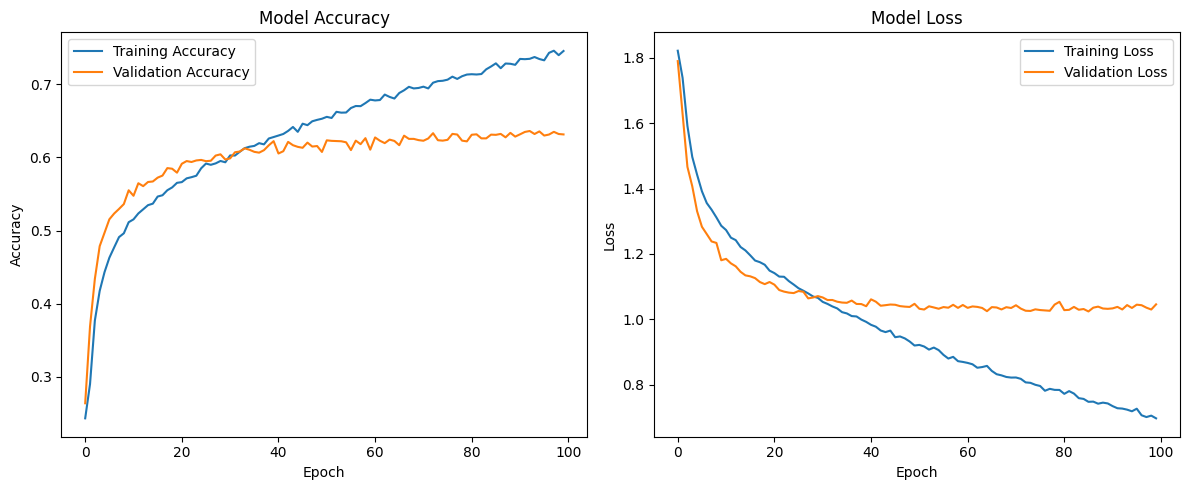

In [32]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Save model
model.save('emotion_model.h5')

## Test Model

In [2]:
# Load model
model = load_model('emotion_model.h5')

In [3]:
def feature_extraction(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
model prediction is  fear


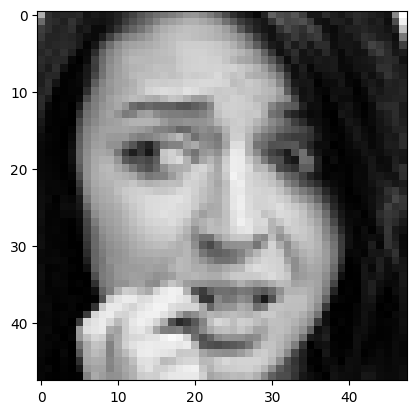

In [4]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

image = 'dataset/test/fear/21.jpg'
print('original image is of fear')
img = feature_extraction(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print('model prediction is ', pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
model prediction is  sad


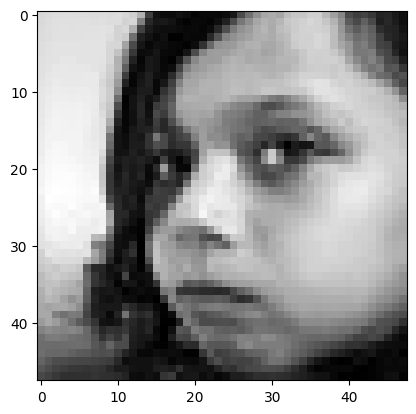

In [35]:
image = 'dataset/test/fear/35410.jpg'
print('original image is of fear')
img = feature_extraction(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print('model prediction is ', pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
model prediction is  happy


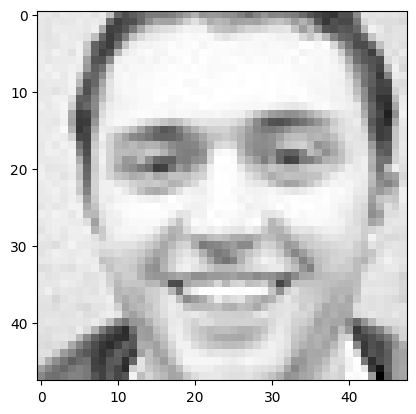

In [29]:
image = 'dataset/test/happy/30.jpg'
print('original image is of happy')
img = feature_extraction(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print('model prediction is ', pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')